In [1]:
#EP Phys 512
#Question 4

In [2]:
import numpy as np
import matplotlib.pyplot as mpl
from wmap_camb_example import get_spectrum
import corner

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

In [3]:
#write a Markov-chain Mmonte carlo
#fit basic 6 parameters, including tau

#REJECT any steps that try to sammple a negative tau.

#SAVE THE CHAINS

#use covariance matrix from part 2

In [4]:
def chi2(data, pars):
    ypred = get_spectrum(pars)
    ypred = ypred[2:1199+2] #chop down to correct size
    return np.sum( (data[:,1] - ypred)**2/data[:,2]**2 ) #wmap[:,1] =data , 2=std on data point

In [5]:
# STEP 0: SET UP PARAMETERS

#running the mcmc
n = 10000 #number of steps
pars = np.asarray([6.93351658e+01, 2.24911838e-02, 1.13886400e-01, 5.00000000e-02,
 2.04230773e-09, 9.69783026e-01])
wmap=np.loadtxt('wmap_tt_spectrum_9yr_v5.txt') #this is the data
chifun = chi2
# par_step = np.asarray([ 1.54518611e-04, -1.74432104e-07, -1.25736616e-06,  0.00000000e+00,
#  -1.47018482e-14, -2.65730611e-06])
# par_sigs = np.asarray([[3.72050854e+00, 8.63940293e-04, 7.15760479e-03, 1.53078691e-01,
#  5.91976432e-10, 2.67853773e-02]])
mat = np.loadtxt('newton_lhs.txt')
print('mat is ', mat)
r = np.linalg.cholesky(np.linalg.inv(mat))
print('r is ', r)
d = np.dot(r, np.random.randn(r.shape[0]))
print('d is ', d)

mat is  [[ 2.28897874e+00 -3.63692395e+03  1.21642860e+03  2.10092100e+02
  -5.24226027e+10  2.89523302e+01]
 [-3.63692395e+03  1.78912044e+07 -1.95362787e+06 -2.24588757e+05
   5.69883758e+13 -4.55535320e+05]
 [ 1.21642860e+03 -1.95362787e+06  1.77853961e+06  6.51338381e+05
  -1.64411195e+14  1.70050907e+05]
 [ 2.10092100e+02 -2.24588757e+05  6.51338381e+05  2.88230050e+05
  -7.28411610e+13  7.08627604e+04]
 [-5.24226027e+10  5.69883758e+13 -1.64411195e+14 -7.28411610e+13
   1.84193154e+22 -1.81667834e+13]
 [ 2.89523302e+01 -4.55535320e+05  1.70050907e+05  7.08627604e+04
  -1.81667834e+13  4.05613077e+04]]
r is  [[ 3.72050854e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.16736143e-04  4.82371361e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.66160448e-03  1.84847844e-03  1.85403870e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.16798058e-01  4.00862636e-02 -2.14552785e-02  8.78866415e-02
   0.00000

In [6]:
#def mcmc(pars, data, step, chi2fun, n)
#create data holding members
npar = len(pars)
chain = np.zeros([n, npar]) #track each step for each parameter in chain
chi2vec = np.zeros(n) #keep track of chi2 at each step

#calculate chi2 to determine step condition
chi2_cur = chifun(wmap,pars)
print('our current chi2 value is ', chi2_cur)

#do actual chain calculations
for ii in range(n):
#     pars_trial = pars+np.random.randn(npar)*par_step #randomly add to each parameters
    pars_trial = pars + np.dot(r, np.random.randn(r.shape[0]))
    if pars_trial[3] > 0: #only go forward if tau is positive, can't be negative
        chi2_trial = chifun(wmap, pars_trial) #check what chi2 value that would give
        accept_prob = np.exp(-0.5*(chi2_trial - chi2_cur)) #prob that we take step
        if np.random.rand(1) < accept_prob: #take step
            pars=pars_trial
            chi2_cur = chi2_trial
    chain[ii, :] = pars #keep track of where we've been
    chi2vec[ii]=chi2_cur
#     print('iter ', ii, ' pars ', pars)
#     print('chi2_cur ', chi2_cur)

our current chi2 value is  1227.9356743698859


In [7]:
print(chi2vec)

par_sigs2 = np.std(chain, axis=0)
print('new par sigs : ', par_sigs2)

[1227.93567437 1227.93567437 1227.93567437 ... 1231.67457    1231.67457
 1231.67457   ]
new par sigs :  [2.58182361e+00 5.57359911e-04 5.37406236e-03 5.82429533e-02
 2.50410158e-10 1.71802480e-02]


In [8]:
#this will overwrite it
np.savetxt("chain.txt", chain)
np.savetxt("chi2vec.txt", chi2vec)

chain sigmas are  [2.58182361e+00 5.57359911e-04 5.37406236e-03 5.82429533e-02
 2.50410158e-10 1.71802480e-02]
chain means are  [7.17488237e+01 2.30832492e-02 1.09667242e-01 1.16593851e-01
 2.32633762e-09 9.89407148e-01]


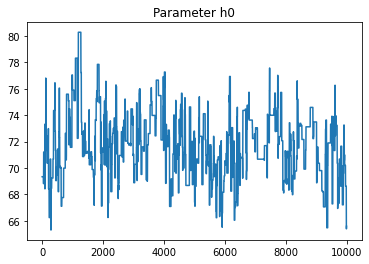

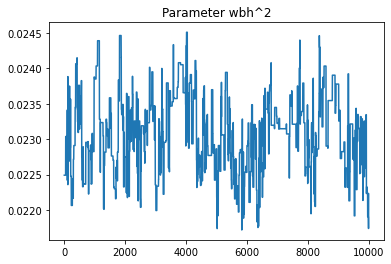

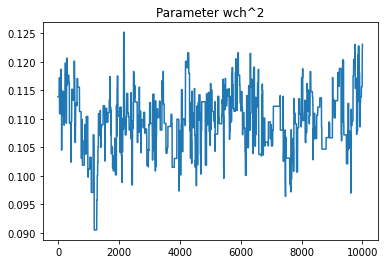

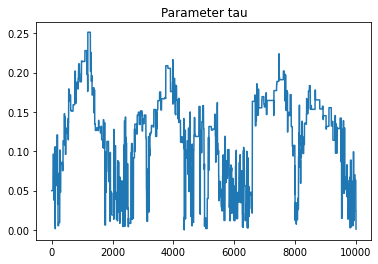

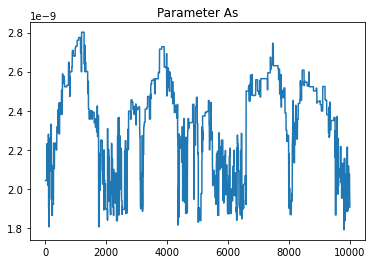

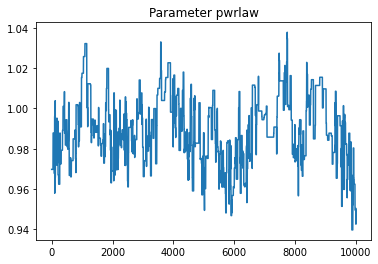

In [9]:
print('chain sigmas are ', np.std(chain, axis=0))
print('chain means are ', np.mean(chain, axis=0))

par_lab = ['h0', 'wbh^2', 'wch^2', 'tau', 'As', 'pwrlaw']
for ii in range(len(pars)):
    mpl.figure()
    mpl.plot(chain[:, ii])
    mpl.title('Parameter ' + par_lab[ii])
    mpl.show()

corner plot of chain 


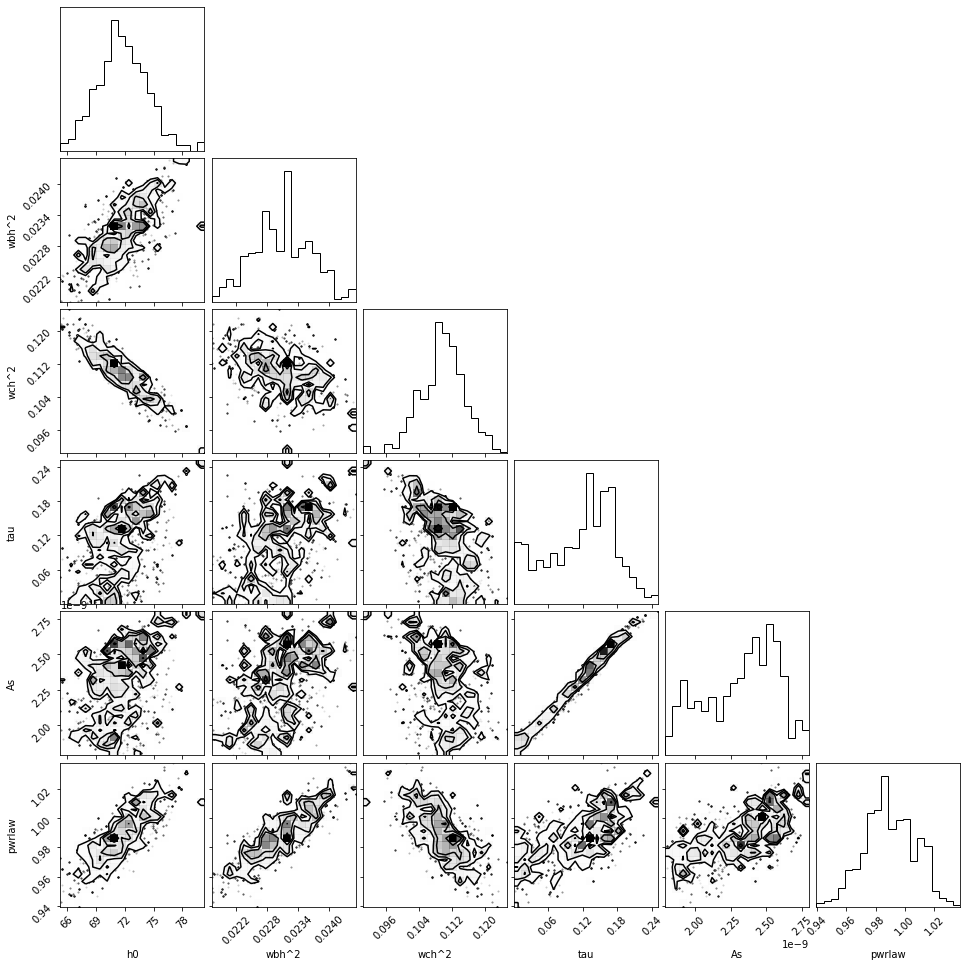

In [11]:
print('corner plot of chain ')
figure = corner.corner(chain, labels=['h0', 'wbh^2', 'wch^2', 'tau', 'As', 'pwrlaw'])